In [43]:
import numpy as np
from numpy import pi
from numpy import inf
import matplotlib.pyplot as plt
import dionysus as sus
import pandas as pd

In [44]:
mag1 = np.loadtxt("1.12.txt")
mag2 = np.loadtxt("2.24.txt")
mag3 = np.loadtxt("3.56.txt")

In [45]:
def Delay_Embeding(x, d=2):
  N = x.shape[0]
  Y = np.zeros((N-d, d))
  for i in range(N - d):
    Y[i, :] = x[i:i+d]
    
  return Y

In [46]:
def DGMS(point, dim, rad):
  simp = sus.fill_rips(point, dim, rad)
  hp = sus.homology_persistence(simp)
  dgms = sus.init_diagrams(hp, simp)
  return dgms

In [47]:
def PH(dgms, Betti = 0):
  I=[]
  persist=[]
  rc=[]
  for i, dgm in enumerate(dgms):
    for pt in dgm:
          I.append(i)
          persist.append(pt.death-pt.birth)
          rc.append(pt.birth)
  pa=[]
  ra=[]
  ia = []
  for i in range (0, len(persist)):
    if persist[i]!= inf and I[i] == Betti:
          pa.append(persist[i])
          ra.append(rc[i])
          ia.append(I[i])
  return pa, ra, ia  

In [48]:
def PDF(ra, pa):
    plt.figure(figsize=(12, 5))
    df=pd.DataFrame( {'f(r)':ra,'persistence':pa})
    ax=df.plot.hexbin(x='f(r)',y='persistence',gridsize=25)
    plt.show();

In [49]:
def Barcode(ra, pa, ia):
    plt.figure(figsize=(12, 5))
    for i in range(len(ia)):
        if(ia[i] == 0): clr='red'
        if(ia[i] == 1): clr='darkorange'
        if(ia[i] == 2): clr='blue'
        # print([pa[i],pa[i]+ra[i]])
        # print(ra[i])
        plt.yticks([])
        plt.title(r'$Barcode$', fontsize = 18, fontweight='bold')
        plt.xlabel(r'$\rho$', fontsize=14, fontweight='bold')
        plt.plot([pa[i],pa[i]+ra[i]],[ia[i]+i,ia[i]+i], color = clr)
    

In [50]:
dim = 3
point1 = Delay_Embeding(mag1, dim)
point2 = Delay_Embeding(mag2, dim)
point3 = Delay_Embeding(mag3, dim)

In [51]:
dgms1 = DGMS(point1[:100], dim, 0.05)

In [52]:
dgms2 = DGMS(point2[:100], dim, 0.05)

In [53]:
dgms3 = DGMS(point3[:100], dim, 0.05)

In [54]:
print(dgms1)
print(dgms2)
print(dgms3)

[Diagram with 100 points, Diagram with 18 points, Diagram with 1 points, Diagram with 461565 points]
[Diagram with 100 points, Diagram with 27 points, Diagram with 0 points, Diagram with 18563 points]
[Diagram with 100 points, Diagram with 31 points, Diagram with 6 points, Diagram with 194516 points]


In [55]:
pa1, ra1, ia1 = PH(dgms1, 1)
pa2, ra2, ia2 = PH(dgms2, 1)
pa3, ra3, ia3 = PH(dgms3, 1)

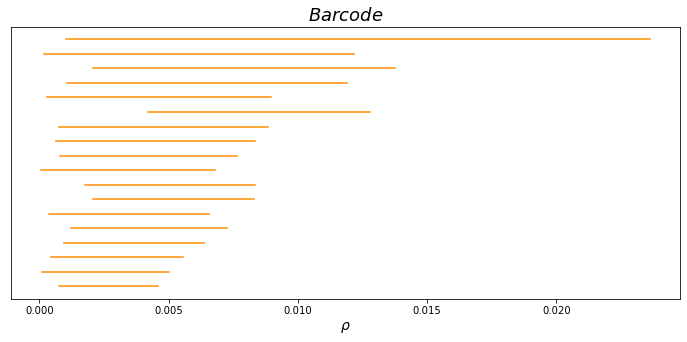

In [56]:
Barcode(ra1, pa1, ia1)

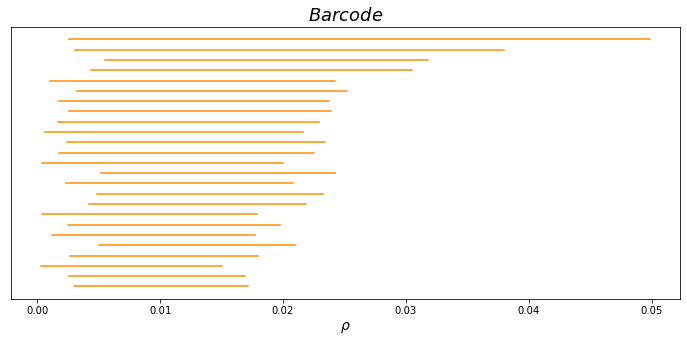

In [57]:
Barcode(ra2, pa2, ia2)

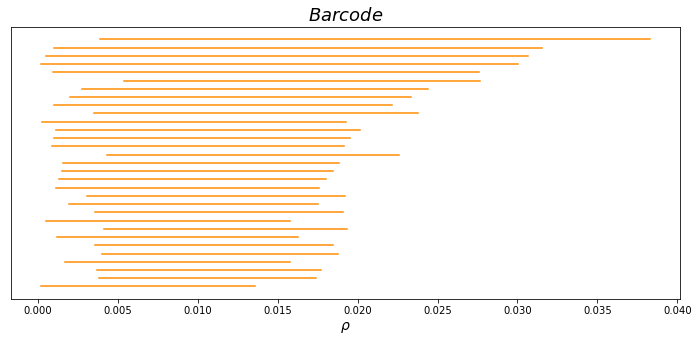

In [58]:
Barcode(ra3, pa3, ia3)

<Figure size 864x360 with 0 Axes>

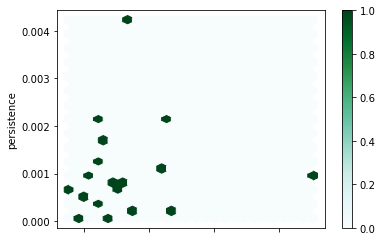

In [59]:
PDF(ra1, pa1)

<Figure size 864x360 with 0 Axes>

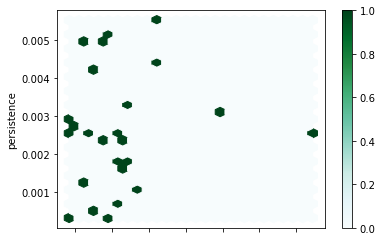

In [60]:
PDF(ra2, pa2)

<Figure size 864x360 with 0 Axes>

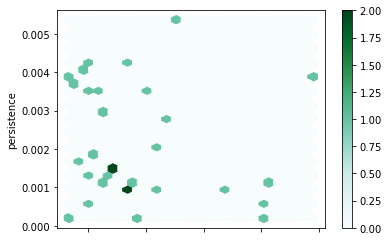

In [61]:
PDF(ra3, pa3)